In [22]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

file_path1 = 'vw_churndata.csv'
file_path2 = 'vw_joindata.csv'


df1=pd.read_csv(file_path1)
df2=pd.read_csv(file_path2)


print(df1.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [23]:
print(df2.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre

In [24]:
# Dropping columns that won't be used for prediction

df1 = df1.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]


# Encoding categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    df1[column] = label_encoders[column].fit_transform(df1[column])



# Manually encoding the target variable 'Customer_Status'

df1['Customer_Status'] = df1['Customer_Status'].map({'Stayed': 0, 'Churned': 1})



# Splitting data into features and target

X = df1.drop('Customer_Status', axis=1)

y = df1['Customer_Status']



# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initializing the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Training the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[135   6]
 [ 25  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       141
           1       0.85      0.58      0.69        59

    accuracy                           0.84       200
   macro avg       0.85      0.77      0.79       200
weighted avg       0.85      0.84      0.84       200



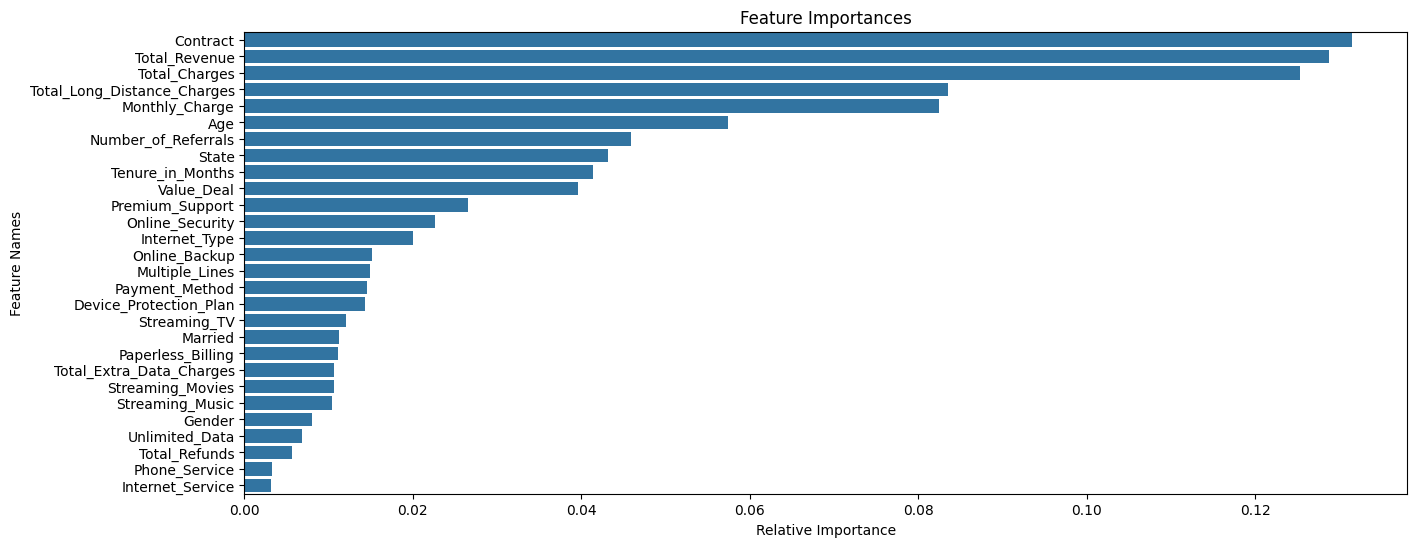

In [26]:
# Making predictions

y_pred = rf_model.predict(X_test)



# Evaluating the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))



# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]



# Plotting the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [27]:
print(df2.head())


# Retaining the original DataFrame to preserve unencoded columns

original_data = df2.copy()



# Retaining the Customer_ID column

customer_ids = df2['Customer_ID']



# Dropping unnecessary columns that won't be used for prediction in the encoded DataFrame

df2 = df2.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)



# Encoding categorical variables using the saved label encoders

for column in df2.select_dtypes(include=['object']).columns:

    df2[column] = label_encoders[column].transform(df2[column])



# Making predictions

new_predictions = rf_model.predict(df2)



# Adding predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions



# Filtering the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]



  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre

In [28]:
# mounting the google drive to save the results
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# saving the result
original_data.to_csv(r"/content/drive/MyDrive/Churn Prediction/prediction.csv", index=False)

After that, I downloaded the result's CSV file from my Google
drive and used for Churn Prediction Analysis in PowerBI